## Bernstein-Vaziraniのアルゴリズム

### 概要
以下のような関数$f_a : \{0, 1\}^n \rightarrow \{0, 1\}$を考えます。

$f_a(x) = a \cdot x\quad mod \quad 2$

Bernstein-Vaziraniアルゴリズムを使うと１回の量子回路実行により$f_a(x)$で定められたビット列$a$を求めることができます。

なお、$a, x \in \{0, 1\}^n$はnbitのバイナリ列である。$f_a(x)$は外から知ることができないブラックボックスであるが、任意の入力$x \in \{0, 1\}^n$に対して値を返すものとする。

この場合、それぞれの量子ビットを分離して考えることができ、オラクルの中で当該量子ビットにZゲートが作用したかどうかを判定する問題に置き換えることができる。

まずオラクルの作成をする。

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

In [6]:
def bv_oracle(n):

    oracle_qc = QuantumCircuit(n)
    #zゲートのためのバイナリ列
    b = np.random.randint(1, 2**n)
    b_str = format(b, "0="+str(n)+"b")

    for qubit in range(len(b_str)):
        if b_str[qubit] == "1":
            oracle_qc.z(qubit)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"

    print("oracle is cleated. Binary : {}".format(b_str[::-1]))

    return oracle_gate


In [2]:
def bv_algo(n):
    bv_qc = QuantumCircuit(n, n)

    bv_qc.h(range(n))

    oracle_gate = bv_oracle(n)
    bv_qc.append(oracle_gate, range(n))

    bv_qc.h(range(n))

    bv_qc.measure(range(n), range(n))

    return bv_qc

oracle is cleated. Binary : 0011


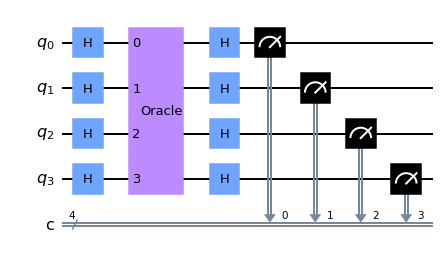

In [7]:
from qiskit.visualization import plot_histogram
n = 4
bv_circuit = bv_algo(n)
bv_circuit.draw(output="mpl")

In [8]:
def get_count(qc, back_end="qasm_simulator", shots = 1024):
    back_end = Aer.get_backend(back_end)
    results = execute(qc, backend=back_end, shots=shots).result()
    count_num = results.get_counts()
    return count_num

{'0011': 1024}


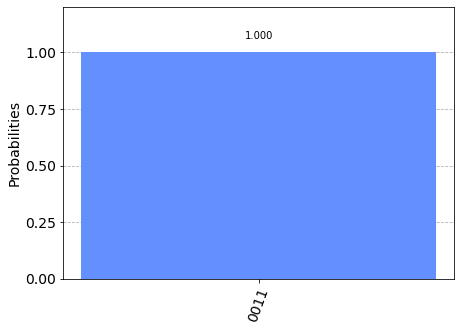

In [9]:
count_num = get_count(bv_circuit)
print(count_num)
plot_histogram(count_num)